In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [ ]:
rng = np.random.default_rng(seed=42)

mean1, mean2 = np.array([-1,-3]), np.array([2, 3])
sigma = np.eye(2)
n = 25
x1 = rng.multivariate_normal(mean1, sigma, n)
x2 = rng.multivariate_normal(mean2, sigma, n)
X = np.concatenate((x1, x2), axis=0)
print(x1.shape, X.shape)

y1 = np.ones(n)
y2 = -np.ones(n)
y = np.concatenate((y1, y2))
print(y.shape)


(25, 2) (50, 2)
(50,)


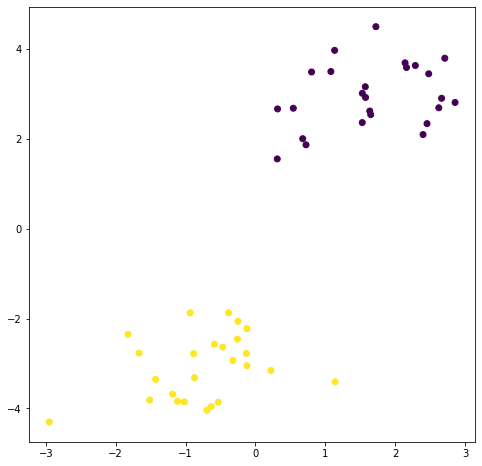

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y);

In [ ]:
def lin_comb(X, y, w, b):
  return (X @ w + b) * y

def loss(X, y, w, b, C):
  margin = w.T @ w / 2
  hinge = C * np.sum(np.maximum(0, 1 - lin_comb(X, y, w, b)))
  l = margin + hinge
  return l

def gradients(X, y, w, b, C):
  comb = lin_comb(X, y, w, b)
  grad_w = w - C * np.sum((np.where(1 - comb > 0, 1, 0) * y).reshape(-1, 1) * X)
  grad_b = -1 * C * np.sum(np.where(1 - comb > 0, 1, 0) * y)
  return grad_w, grad_b

def fit(X, y, C, epochs=100, lr=0.1):
  w = rng.normal(size = X.shape[1])
  b = rng.normal()

  losses=[]
  for _ in range(epochs):
    grad_w, grad_b = gradients(X, y, w, b, C)
    w = w - lr * grad_w
    b = b - lr * grad_b
    losses.append(loss(X, y, w, b, C))

  return w, b, losses

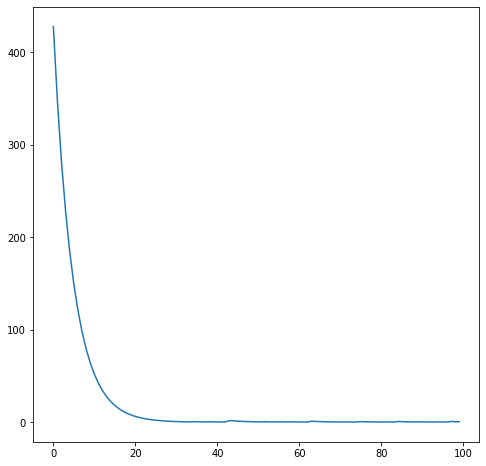

In [ ]:
epochs = 100
lr = 0.1
C = 1
w, b, losses = fit(X, y, C, epochs, lr)
plt.plot(losses)

Decision boundary:    

w1 * d1 + w2 * d2 + b = 0
d2 = (-((w1 * d1) - b)) / w2

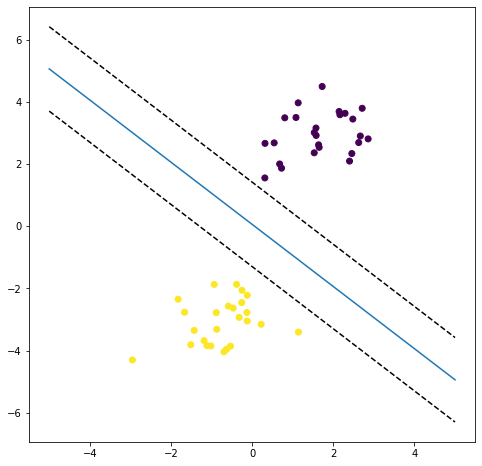

In [ ]:
rng = np.random.default_rng(seed=42)
plt.scatter(X[:,0], X[:,1], c=y);
d_1 = np.linspace(-5, 5, 100)
plt.plot(d_1, -(w[0] * d_1 + b -1) / w[1], color='k',  linestyle='dashed')
plt.plot(d_1, -(w[0] * d_1 + b) / w[1])
plt.plot(d_1, -(w[0] * d_1 + b +1) / w[1] , color='k', linestyle='dashed')